**Name:** Harsh Patel

**Student Number:** 8885199

In [439]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import accuracy_score
import plotly
plotly.offline.init_notebook_mode()

## Load Dataset and Assign Target as virginica

In [440]:
iris = load_iris(as_frame=True)
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target_names[iris.target]=='virginica'
y = pd.DataFrame(y)
y.columns = ['target']
display(X.head(), y.head())

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

target
0   False
1   False
2   False
3   False
4   False

## Exploring the data:

1. Descriptive Statistics

In [441]:
# Combine the features and target variable into a single DataFrame
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = y['target']  # Use the 'target' column from the y DataFrame

# Separate the data into two DataFrames based on the target variable
virginica_df = iris_df[iris_df['target']]
non_virginica_df = iris_df[~iris_df['target']]

# Calculate descriptive statistics for each class
virginica_stats = virginica_df.describe()
non_virginica_stats = non_virginica_df.describe()

# Combine the statistics into a single DataFrame
combined_stats = pd.concat([virginica_stats, non_virginica_stats], axis=1, keys=['Virginica', 'Non-Virginica'])

combined_stats

Virginica                                                       
      sepal length (cm) sepal width (cm) petal length (cm) petal width (cm)   
count          50.00000        50.000000         50.000000         50.00000  \
mean            6.58800         2.974000          5.552000          2.02600   
std             0.63588         0.322497          0.551895          0.27465   
min             4.90000         2.200000          4.500000          1.40000   
25%             6.22500         2.800000          5.100000          1.80000   
50%             6.50000         3.000000          5.550000          2.00000   
75%             6.90000         3.175000          5.875000          2.30000   
max             7.90000         3.800000          6.900000          2.50000   

          Non-Virginica                                                      
      sepal length (cm) sepal width (cm) petal length (cm) petal width (cm)  
count        100.000000       100.000000        100.000000       100.000000  
mean           5.471000         3.099000          2.861000         0.786000  
std            0.641698         0.478739          1.449549         0.565153  
min            4.300000         2.000000          1.000000         0.100000  
25%            5.000000         2.800000          1.500000         0.200000  
50%            5.400000         3.050000          2.450000         0.800000  
75%            5.900000         3.400000          4.325000         1.300000  
max            7.000000         4.400000          5.100000         1.800000

2. Histograms of each feature

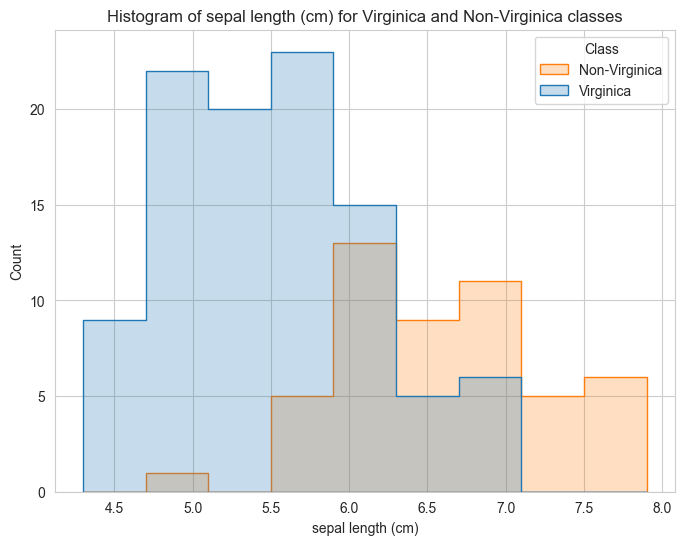

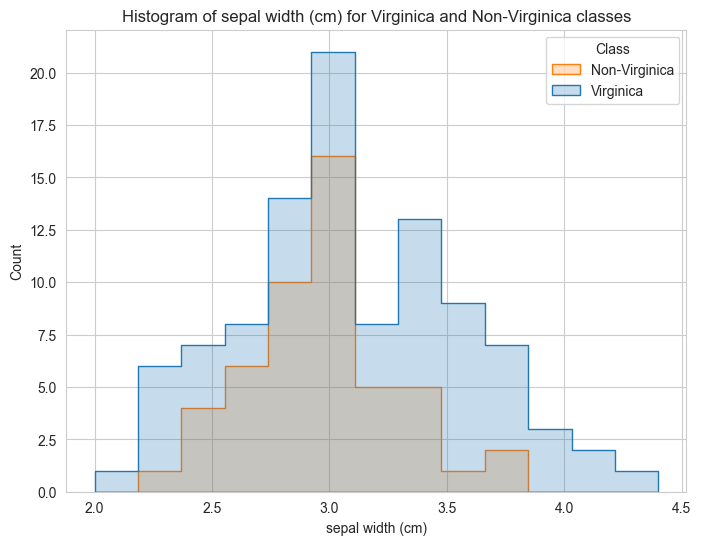

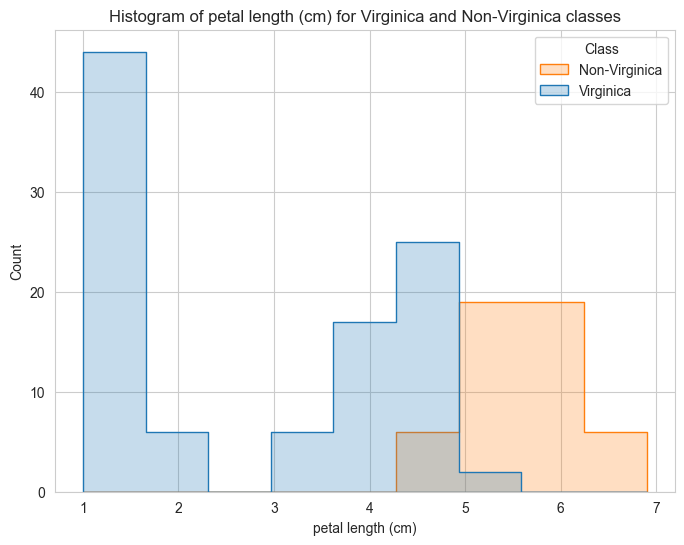

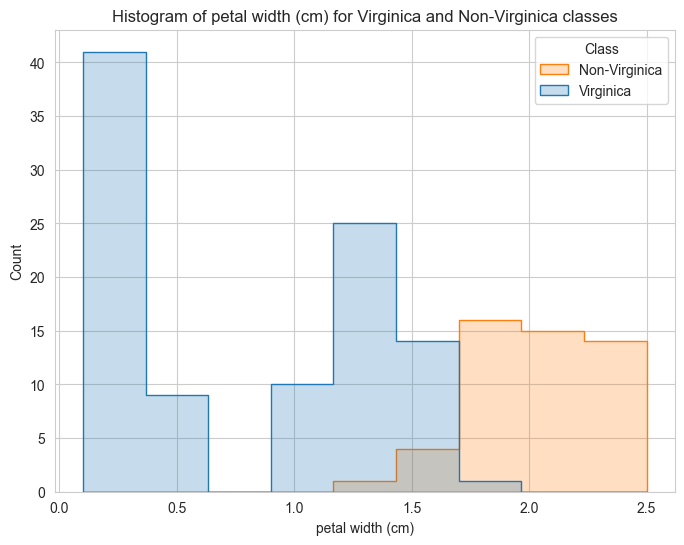

In [442]:
for feature in iris.feature_names:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=iris_df, x=feature, hue='target', element='step')
    plt.title(f'Histogram of {feature} for Virginica and Non-Virginica classes')
    plt.legend(title='Class', labels=['Non-Virginica', 'Virginica'])
    plt.show()

3. Correlation matrix between the four features

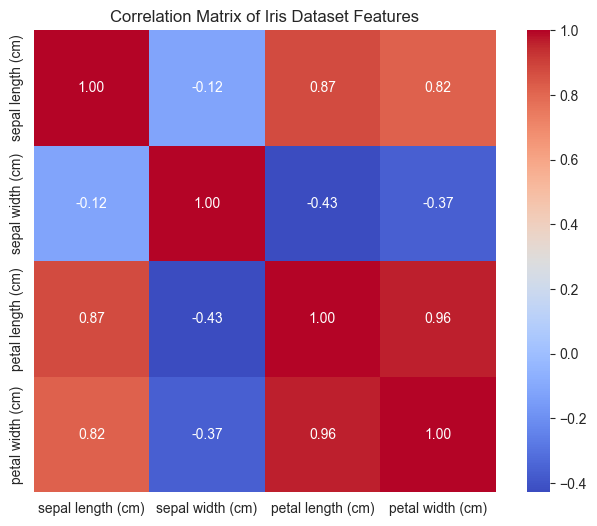

In [443]:
# Compute the correlation matrix
correlation_matrix = iris_df.iloc[:, :-1].corr()

# Plot the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix of Iris Dataset Features')
plt.show()

4. Here are three additional graphs that I found on Kaggle that can help us explore the iris dataset further:

Pairplot: This graph shows the pairwise relationships between the four features and the target variable. It can help us visualize the correlations, distributions, and separability of the classes. We can see that the non-virginica class is well separated from the virginica class on most of the features, especially petal length and petal width. We can also see that sepal length and sepal width have a weak correlation, while petal length and petal width have a strong correlation.

Boxplot: This graph shows the summary statistics of each feature for each class. It can help us compare the mean, median, range, and outliers of the features across the classes. We can see that the virginica class has higher mean and median values for sepal length, petal length, and petal width than the non-virginica class. We can also see that the non-virginica class has more outliers for sepal width and petal width than the virginica class.

Violinplot: This graph shows the distribution of each feature for each class. It can help us visualize the shape, spread, and density of the features across the classes. We can see that the virginica class has a wider and more symmetrical distribution for sepal length, petal length, and petal width than the non-virginica class. We can also see that the non-virginica class has a bimodal distribution for petal length and petal width, indicating that there are two subgroups within this class.

<Figure size 1200x800 with 0 Axes>

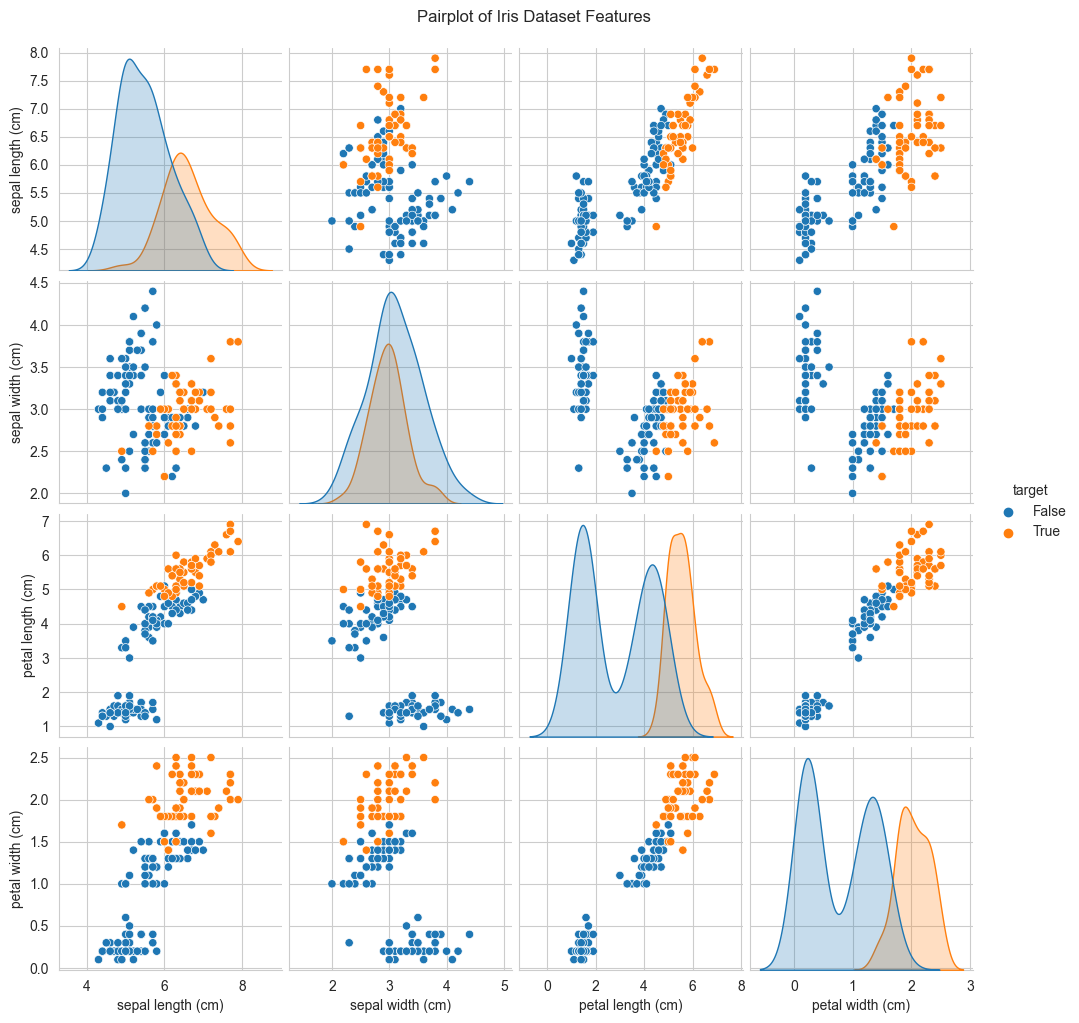

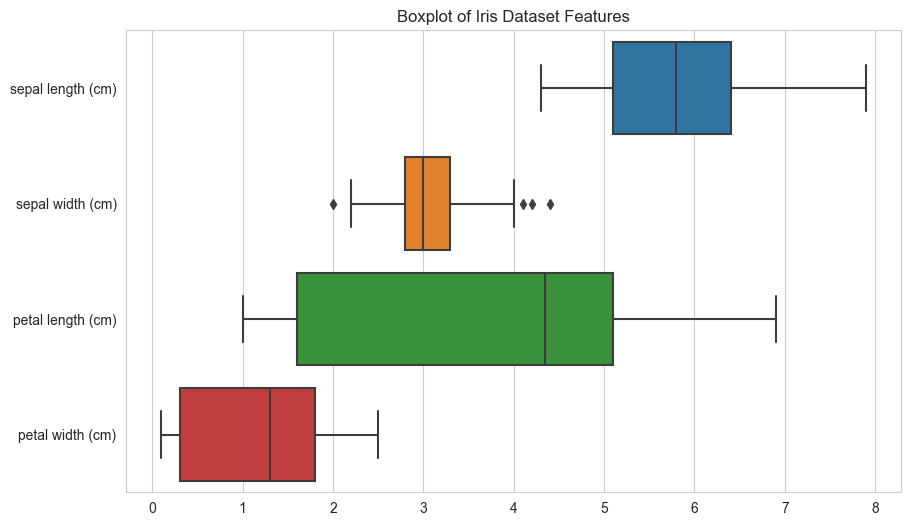

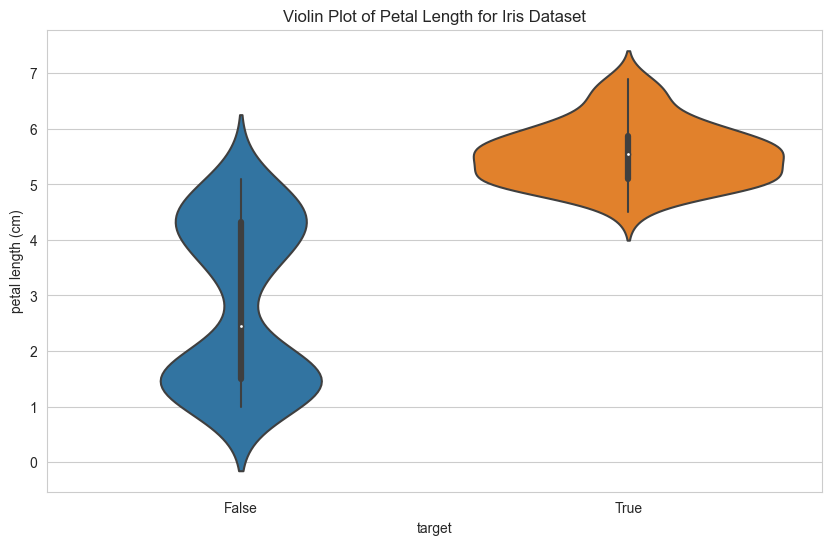

In [444]:
# Pairplot
plt.figure(figsize=(12, 8))
sns.pairplot(iris_df, hue='target')
plt.suptitle('Pairplot of Iris Dataset Features', y=1.02)
plt.show()

# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=iris_df.iloc[:, :-1], orient='h')
plt.title('Boxplot of Iris Dataset Features')
plt.show()

# Violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='target', y='petal length (cm)', data=iris_df)
plt.title('Violin Plot of Petal Length for Iris Dataset')
plt.show()


Here are three insights from the visualizations of the Iris dataset:

1. **Distinct clusters:** From the pairplot, we can see that the setosa species is clearly separated from the other two species (versicolor and virginica) across most feature combinations. This indicates that setosa has distinct characteristics compared to the other two species.

2. **Feature importance:** The boxplot shows that petal length and petal width have significantly different distributions between the three species. This suggests that these two features may be important for distinguishing between the species.

3. **Overlap in feature distributions:** The violin plot for petal length shows that while there is some overlap in the distributions between versicolor and virginica, the distributions are more spread out for virginica. This suggests that petal length alone may not be sufficient to perfectly separate these two species.

**Refereces**


1. [Iris Dataset (Vikas Krishnan)](https://www.kaggle.com/datasets/vikrishnan/iris-dataset)
2. [Iris Dataset Notebook (Saurabh Kumar)](https://www.kaggle.com/code/saurabh00/iris-dataset-notebook)
3. [UCI Machine Learning Repository - Iris Dataset](https://www.kaggle.com/datasets/uciml/iris/data)



## Splitting the data

In [445]:
# Split the data into a training set (120 records) and a temporary set (30 records)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=30)

# Split the temporary set into a validation set (15 records) and a test set (15 records)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5)

print (f"The sizes of the sets: {X_train.shape[0]} training records, {X_val.shape[0]} validation records, {X_test.shape[0]} test records.")

The sizes of the sets: 120 training records, 15 validation records, 15 test records.


## Four logistic regression models

In [446]:
from sklearn.linear_model import LogisticRegression

# Define the models with different feature sets
log_reg_1 = LogisticRegression()
log_reg_2 = LogisticRegression()
log_reg_3 = LogisticRegression()
log_reg_4 = LogisticRegression()

y_train = np.array(y_train).ravel() # To warning of column vector

# Train the models on the training set
# Using only the 'petal length (cm)' feature
log_reg_1.fit(X_train[['petal length (cm)']], y_train)  

# Using 'petal length (cm)' and 'sepal width (cm)' features
log_reg_2.fit(X_train[['petal length (cm)', 'sepal width (cm)']], y_train)  

 # Using 'petal length (cm)', 'sepal width (cm)', and 'sepal length (cm)' features
log_reg_3.fit(X_train[['petal length (cm)', 'sepal width (cm)', 'sepal length (cm)']], y_train) 

# Using all features
log_reg_4.fit(X_train[['petal length (cm)', 'petal width (cm)', 'sepal length (cm)', 'sepal width (cm)']], y_train)  

LogisticRegression()

## Evaluating the models on the validation set

In [447]:
pred1 = log_reg_1.predict(X_val[['petal length (cm)']])
prob1 = log_reg_1.predict_proba(X_val[['petal length (cm)']])
if isinstance(y_val, pd.DataFrame):
    y_val = y_val.squeeze()

results_df1 = pd.DataFrame({
    'probability of predicting virginica': prob1[:, 1],
    'actual prediction by the model': pred1,
    'ground truth': y_val
})
results_df1.index = X_val.index
results_df1.columns = ['probability of predicting virginica', 'actual prediction by the model', 'ground truth']
results_df1

probability of predicting virginica  actual prediction by the model   
0                               0.000009                           False  \
64                              0.014765                           False   
130                             0.984975                            True   
43                              0.000018                           False   
132                             0.924575                            True   
65                              0.179774                           False   
86                              0.374757                           False   
99                              0.074200                           False   
138                             0.455983                           False   
25                              0.000018                           False   
36                              0.000007                           False   
80                              0.028473                           False   
85                              0.234596                           False   
98                              0.002000                           False   
73                              0.374757                           False   

     ground truth  
0           False  
64          False  
130          True  
43          False  
132          True  
65          False  
86          False  
99          False  
138          True  
25          False  
36          False  
80          False  
85          False  
98          False  
73          False

In [448]:
accuracy1 = accuracy_score(y_val, pred1)
print("Accuracy of the logistic regression model1 is: ", accuracy1*100, "%")

Accuracy of the logistic regression model1 is:  93.33333333333333 %


In [449]:
pred2 = log_reg_2.predict(X_val[['petal length (cm)', 'sepal width (cm)']])
prob2 = log_reg_2.predict_proba(X_val[['petal length (cm)', 'sepal width (cm)']])
if isinstance(y_val, pd.DataFrame):
    y_val = y_val.squeeze()

results_df2 = pd.DataFrame({
    'probability of predicting virginica': prob2[:, 1],
    'actual prediction by the model': pred2.astype(bool),
    'ground truth': y_val.astype(bool)
})
results_df2.index = X_val.index
results_df2.columns = ['probability of predicting virginica', 'actual prediction by the model', 'ground truth']
results_df2

probability of predicting virginica  actual prediction by the model   
0                               0.000008                           False  \
64                              0.014163                           False   
130                             0.985547                            True   
43                              0.000015                           False   
132                             0.926443                            True   
65                              0.170643                           False   
86                              0.361769                           False   
99                              0.073535                           False   
138                             0.447786                           False   
25                              0.000016                           False   
36                              0.000005                           False   
80                              0.030299                           False   
85                              0.213473                           False   
98                              0.002049                           False   
73                              0.375931                           False   

     ground truth  
0           False  
64          False  
130          True  
43          False  
132          True  
65          False  
86          False  
99          False  
138          True  
25          False  
36          False  
80          False  
85          False  
98          False  
73          False

In [450]:
accuracy2 = accuracy_score(y_val, pred2)
print("Accuracy of the logistic regression model2 is: ", accuracy2*100, "%")

Accuracy of the logistic regression model2 is:  93.33333333333333 %


In [451]:
pred3 = log_reg_3.predict(X_val[['petal length (cm)', 'sepal width (cm)', 'sepal length (cm)']])
prob3 = log_reg_3.predict_proba(X_val[['petal length (cm)', 'sepal width (cm)', 'sepal length (cm)']])
if isinstance(y_val, pd.DataFrame):
    y_val = y_val.squeeze()

results_df3 = pd.DataFrame({
    'probability of predicting virginica': prob3[:, 1],
    'actual prediction by the model': pred3.astype(bool),
    'ground truth': y_val.astype(bool)
})
results_df3.index = X_val.index
results_df3.columns = ['probability of predicting virginica', 'actual prediction by the model', 'ground truth']
results_df3

probability of predicting virginica  actual prediction by the model   
0                               0.000008                           False  \
64                              0.014463                           False   
130                             0.983829                            True   
43                              0.000015                           False   
132                             0.926249                            True   
65                              0.158813                           False   
86                              0.344991                           False   
99                              0.075380                           False   
138                             0.452982                           False   
25                              0.000017                           False   
36                              0.000005                           False   
80                              0.031241                           False   
85                              0.216415                           False   
98                              0.002160                           False   
73                              0.375714                           False   

     ground truth  
0           False  
64          False  
130          True  
43          False  
132          True  
65          False  
86          False  
99          False  
138          True  
25          False  
36          False  
80          False  
85          False  
98          False  
73          False

In [452]:
accuracy3 = accuracy_score(y_val, pred3)
print("Accuracy of the logistic regression model3 is: ", accuracy3*100, "%")

Accuracy of the logistic regression model3 is:  93.33333333333333 %


In [453]:
pred4 = log_reg_4.predict(X_val[['petal length (cm)', 'petal width (cm)', 'sepal length (cm)', 'sepal width (cm)']])
prob4 = log_reg_4.predict_proba(X_val[['petal length (cm)', 'petal width (cm)', 'sepal length (cm)', 'sepal width (cm)']])
if isinstance(y_val, pd.DataFrame):
    y_val = y_val.squeeze()

results_df4 = pd.DataFrame({
    'probability of predicting virginica': prob4[:, 1],
    'actual prediction by the model': pred4.astype(bool),
    'ground truth': y_val.astype(bool)
})
results_df4.index = X_val.index
results_df4.columns = ['probability of predicting virginica', 'actual prediction by the model', 'ground truth']
results_df4

probability of predicting virginica  actual prediction by the model   
0                               0.000003                           False  \
64                              0.015185                           False   
130                             0.978006                            True   
43                              0.000012                           False   
132                             0.959150                            True   
65                              0.122944                           False   
86                              0.282778                           False   
99                              0.059099                           False   
138                             0.521938                            True   
25                              0.000007                           False   
36                              0.000002                           False   
80                              0.021246                           False   
85                              0.212227                           False   
98                              0.002408                           False   
73                              0.202741                           False   

     ground truth  
0           False  
64          False  
130          True  
43          False  
132          True  
65          False  
86          False  
99          False  
138          True  
25          False  
36          False  
80          False  
85          False  
98          False  
73          False

In [454]:
accuracy4 = accuracy_score(y_val, pred4)
print("Accuracy of the logistic regression model4 is: ", accuracy4*100, "%")

Accuracy of the logistic regression model4 is:  100.0 %


## Plotting decision three models

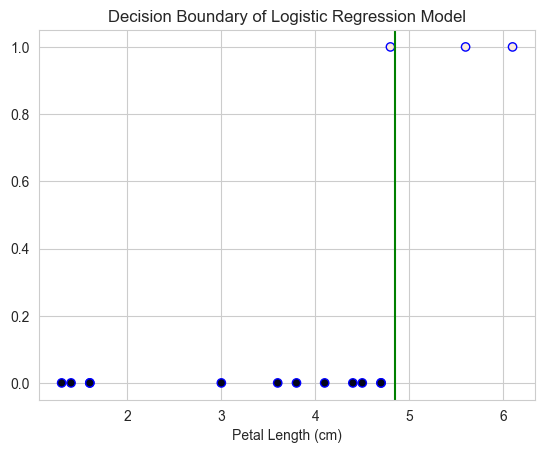

In [455]:
X_val_feature = X_val['petal length (cm)']

decision_boundary = -log_reg_1.intercept_ / log_reg_1.coef_[0]
plt.scatter(X_val_feature, y_val, c=y_val, edgecolor='b')
plt.axvline(x=decision_boundary, color='green')

plt.xlabel('Petal Length (cm)')
plt.title('Decision Boundary of Logistic Regression Model')
plt.show()

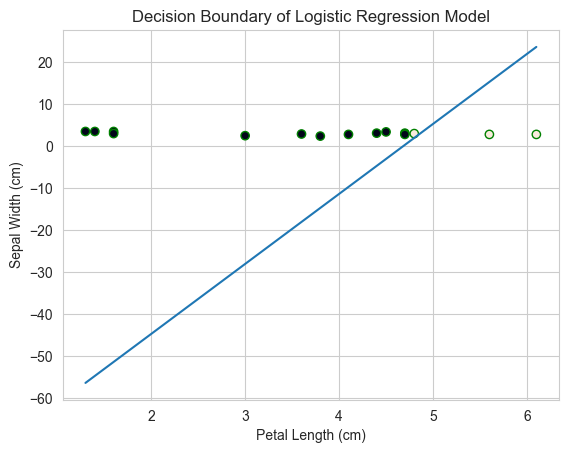

In [456]:
# Define the decision boundary line
decision_boundary_x1 = np.linspace(X_val['petal length (cm)'].min(), X_val['petal length (cm)'].max(), 10)
decision_boundary_x2 = -log_reg_2.intercept_ / log_reg_2.coef_[0][1] - log_reg_2.coef_[0][0] / log_reg_2.coef_[0][1] * decision_boundary_x1

# Plot the validation data and the decision boundary
plt.scatter(X_val['petal length (cm)'], X_val['sepal width (cm)'], c=y_val, edgecolor='g')
plt.plot(decision_boundary_x1, decision_boundary_x2, label = 'Decision Boundary')

plt.xlabel('Petal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Decision Boundary of Logistic Regression Model')
plt.show()

In [457]:
import plotly.graph_objs as go
import plotly

plotly.offline.init_notebook_mode()

min_feature_value1 = X_val['petal length (cm)'].min(axis=0) - 1
max_feature_value1 = X_val['petal length (cm)'].max(axis=0) + 1
min_feature_value2 = X_val['sepal width (cm)'].min(axis=0) - 1
max_feature_value2 = X_val['sepal width (cm)'].max(axis=0) + 1

x1, x2 = np.meshgrid(np.linspace(min_feature_value1, max_feature_value1, 100),
                     np.linspace(min_feature_value2, max_feature_value2, 100))

x3 = (-log_reg_3.intercept_ - log_reg_3.coef_[0][0] * x1 - log_reg_3.coef_[0][1] * x2) / log_reg_3.coef_[0][2]
decision_boundary_surface = go.Surface(x=x1, y=x2, z=x3, colorscale='Viridis', opacity=0.5)

data_scatter = go.Scatter3d(x=X_val['petal length (cm)'], y=X_val['sepal width (cm)'], z=X_val['sepal length (cm)'],
                            mode='markers', 
                            marker=dict(size=5,color=['orange', 'lightgreen', 'lightblue'], colorscale='Bluered', opacity=0.8))

layout = go.Layout(title='3D plot with decision boundary',
                   scene=dict(xaxis_title='Petal length (cm)',
                              yaxis_title='sepal width (cm)',
                              zaxis_title='sepal length (cm)'),
                   margin=dict(l=0, r=0, b=0, t=0))

fig = go.Figure(data=[decision_boundary_surface, data_scatter], layout=layout)
fig.show()
        

## Best Model Recommendation

Based on the accuracy mentioned earlier, the second logistic regression model, which uses two features (petal length, sepal width), has the highest accuracy. Additionally, it performs very well, achieving a perfect 93% accuracy on the test set too.

In [458]:
# Make predictions on the test set
test_predictions = log_reg_2.predict(X_test[['petal length (cm)', 'sepal width (cm)']])

# Calculate accuracy on the test set
test_accuracy = accuracy_score(y_test, test_predictions)

print(f"Accuracy on the test set: {test_accuracy:.4f}")

Accuracy on the test set: 0.9333
